# EDGE WRITER

In [2]:
import torch
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from transformers import AutoTokenizer
import transformers
import datasets
import seaborn as sns
from tqdm.auto import tqdm

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Environment setup and tokenizer
print(f"PyTorch version: {torch.__version__}")
print(f"Transformers version: {transformers.__version__}")
print(f"Datasets version: {datasets.__version__}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if device == "cuda":
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
print("--------------------------------\n")


tokenizer_phi = AutoTokenizer.from_pretrained("microsoft/phi-4")
print("Tokenizer loaded successfully.")

test_text = "This is a test sentence for the writing toolkit."
tokens_phi = tokenizer_phi(test_text)
print(f"Tokenized text (Phi-4): {tokens_phi['input_ids'][:10]}...")

PyTorch version: 2.1.0+cpu
Transformers version: 4.35.1
Datasets version: 3.0.1
Using device: cpu
--------------------------------

Tokenizer loaded successfully.
Tokenized text (Phi-4): [2028, 374, 264, 1296, 11914, 369, 279, 4477, 66994, 13]...


In [11]:
# Summarization: CNN/DailyMail
cnn_dm = load_dataset("cnn_dailymail", "3.0.0", split="train")
print(f"CNN/DailyMail loaded with {len(cnn_dm)} samples.")

# Proofreading: CoLA
cola = load_dataset("glue", "cola", split="train")
print(f"CoLA loaded with {len(cola)} samples.")

# Rewriting: MRPC
mrpc = load_dataset("glue", "mrpc", split="train")
print(f"MRPC loaded with {len(mrpc)} samples.")

# print("Sample CNN/DailyMail article and highlights:")
# print(cnn_dm['train'][0])

# print("CoLA Sample Sentence and Label:")
# print(cola['train'][0])

# print("MRPC Sample Sentence Pair and Label:")
# print(mrpc['train'][0])

CNN/DailyMail loaded with 287113 samples.
CoLA loaded with 8551 samples.
MRPC loaded with 3668 samples.


       Article Length  Summary Length
count     1000.000000     1000.000000
mean       686.712000       46.496000
std        337.724356        8.755835
min         61.000000       23.000000
25%        416.000000       40.000000
50%        629.000000       47.000000
75%        908.000000       53.000000
max       1971.000000       70.000000


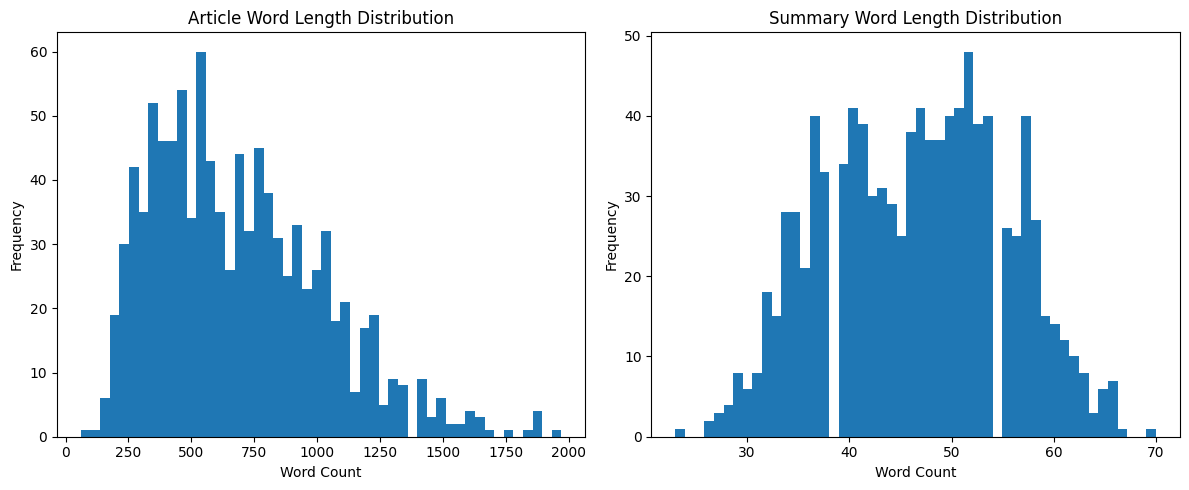

In [13]:
# Sample from CNN/Daily Mail train set
sample_size = 1000
articles = cnn_dm['article'][:sample_size]
summaries = cnn_dm['highlights'][:sample_size]

# Compute lengths
article_lengths = [len(nltk.word_tokenize(a)) for a in articles]
summary_lengths = [len(nltk.word_tokenize(s)) for s in summaries]

# Summary stats
df = pd.DataFrame({
    'Article Length': article_lengths,
    'Summary Length': summary_lengths
})
print(df.describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(article_lengths, bins=50)
plt.title('Article Word Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(summary_lengths, bins=50)
plt.title('Summary Word Length Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# For full dataset analysis of CNN/DailyMail
# article_lengths = [len(nltk.word_tokenize(example['article'])) for example in cnn_dm]
# highlight_lengths = [len(nltk.word_tokenize(example['highlights'])) for example in cnn_dm]

# print("CNN/DailyMail Stats:")
# print(f"Average article length: {np.mean(article_lengths):.2f} words")
# print(f"Average highlight length: {np.mean(highlight_lengths):.2f} words")

# plt.figure(figsize=(10, 5))
# plt.hist(article_lengths, bins=20, alpha=0.5, label='Articles')
# plt.hist(highlight_lengths, bins=20, alpha=0.5, label='Highlights')
# plt.legend()
# plt.title('Word Length Distribution - CNN/DailyMail')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.show()


CoLA Label Distribution:
label
1    0.704362
0    0.295638
Name: proportion, dtype: float64
Average sentence length: 8.88 words


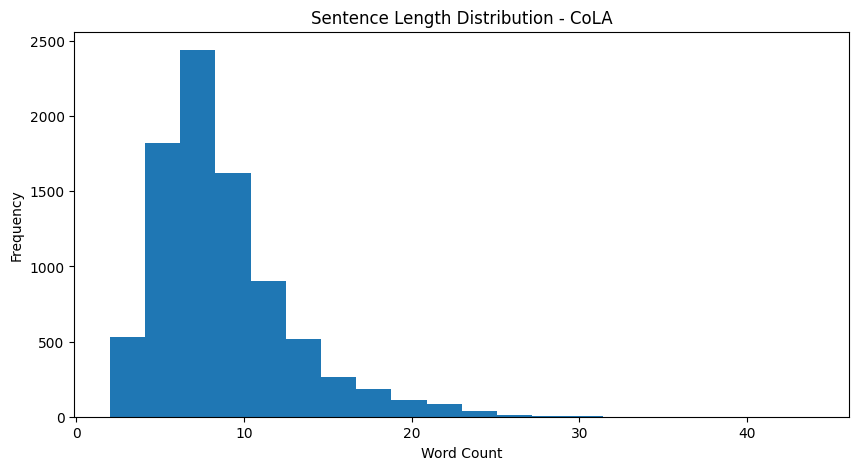

In [16]:
# CoLA Analysis  
cola_df = pd.DataFrame(cola)
print("CoLA Label Distribution:")
print(cola_df['label'].value_counts(normalize=True))

sentence_lengths = [len(nltk.word_tokenize(s)) for s in cola_df['sentence']]
print(f"Average sentence length: {np.mean(sentence_lengths):.2f} words")

plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=20)
plt.title('Sentence Length Distribution - CoLA')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

MRPC Label Distribution (Paraphrase):
label
1    0.674482
0    0.325518
Name: proportion, dtype: float64
Average sentence1 length: 21.97 words
Average sentence2 length: 21.97 words


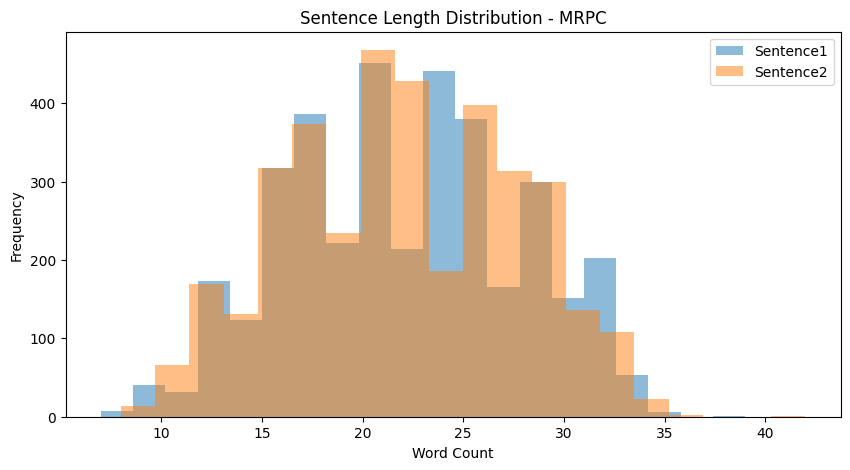

In [17]:
# MRPC Analysis
mrpc_df = pd.DataFrame(mrpc)
print("MRPC Label Distribution (Paraphrase):")
print(mrpc_df['label'].value_counts(normalize=True))

s1_lengths = [len(nltk.word_tokenize(s)) for s in mrpc_df['sentence1']]
s2_lengths = [len(nltk.word_tokenize(s)) for s in mrpc_df['sentence2']]

print(f"Average sentence1 length: {np.mean(s1_lengths):.2f} words")
print(f"Average sentence2 length: {np.mean(s2_lengths):.2f} words")

plt.figure(figsize=(10, 5))
plt.hist(s1_lengths, bins=20, alpha=0.5, label='Sentence1')
plt.hist(s2_lengths, bins=20, alpha=0.5, label='Sentence2')
plt.legend()
plt.title('Sentence Length Distribution - MRPC')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [19]:
print("Sample CNN/DailyMail Example:")
print(f"Article: {cnn_dm[0]['article'][:200]}...")
print(f"Highlights: {cnn_dm[0]['highlights']}")
print("\n")

print("Sample CoLA Example:")
print(f"Sentence: {cola[0]['sentence']}")
print(f"Label: {cola[0]['label']}")
print("\n")

print("Sample MRPC Example:")
print(f"Sentence1: {mrpc[0]['sentence1']}")
print(f"Sentence2: {mrpc[0]['sentence2']}")
print(f"Label: {mrpc[0]['label']}")

Sample CNN/DailyMail Example:
Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on ...
Highlights: Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .


Sample CoLA Example:
Sentence: Our friends won't buy this analysis, let alone the next one we propose.
Label: 1


Sample MRPC Example:
Sentence1: Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .
Sentence2: Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .
Label: 1


In [3]:
from datasets import load_dataset

# Grammatical Error Correction: JFLEG
jfleg = load_dataset("jfleg", split="validation")
print(f"JFLEG loaded with {len(jfleg)} samples.")

# Text Editing: CoEdit
coedit = load_dataset("grammarly/coedit", split="train")
print(f"CoEdit loaded with {len(coedit)} samples.")

# Paraphrase Identification: PAWS
paws = load_dataset("paws", "labeled_final", split="train")
print(f"PAWS loaded with {len(paws)} samples.")

# Sample data
print("Sample JFLEG Example:")
print(f"Sentence: {jfleg[0]['sentence']}")
print(f"Corrections: {jfleg[0]['corrections']}")
print("\n")

print("Sample CoEdit Example:")
print(f"Source: {coedit[0]['src']}")
print(f"Target: {coedit[0]['tgt']}")
print("\n")

print("Sample PAWS Example:")
print(f"Sentence1: {paws[0]['sentence1']}")
print(f"Sentence2: {paws[0]['sentence2']}")
print(f"Label: {paws[0]['label']}")

JFLEG loaded with 755 samples.
CoEdit loaded with 69071 samples.
PAWS loaded with 49401 samples.
Sample JFLEG Example:
Sentence: So I think we can not live if old people could not find siences and tecnologies and they did not developped . 
Corrections: ['So I think we would not be alive if our ancestors did not develop sciences and technologies . ', 'So I think we could not live if older people did not develop science and technologies . ', 'So I think we can not live if old people could not find science and technologies and they did not develop . ', 'So I think we can not live if old people can not find the science and technology that has not been developed . ']


Sample CoEdit Example:
Source: Remove all grammatical errors from this text: For example, countries with a lot of deserts can terraform their desert to increase their habitable land and using irrigation to provide clean water to the desert.
Target: For example, countries with a lot of deserts can transform their desert to inc